In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from dataPath import DATA_PATH
%matplotlib inline

import matplotlib

matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['figure.figsize'] = (10, 10)

In [2]:
# Load the cascade classifier from the xml file.
faceCascade = cv.CascadeClassifier(DATA_PATH + 'models/haarcascade_frontalface_default.xml')
faceNeighborsMax = 10
neighborStep = 1

In [3]:
frame = cv.imread(DATA_PATH + "images/hillary_clinton.jpg")
frameGray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
# frameGray = cv.equalizeHist(frameGray)

# plt.imshow(frame[...,::-1]);plt.show()
# plt.imshow(frameGray);plt.show()

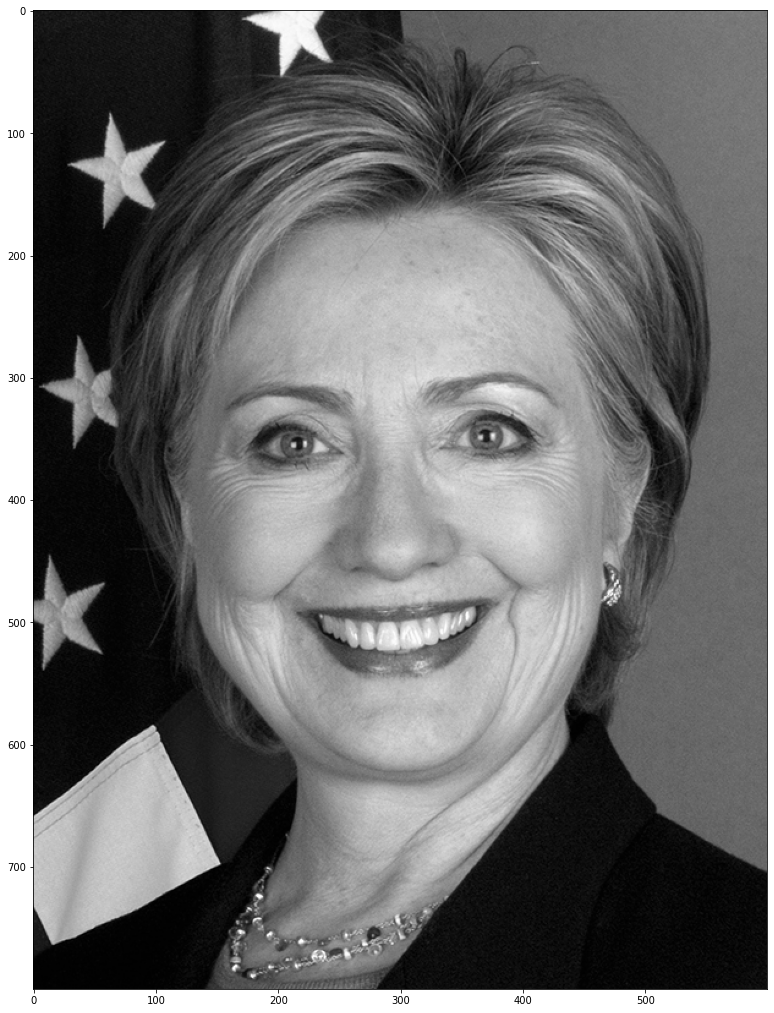

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-9ugsgs06/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [6]:
# Perform multi scale detection of faces
plt.figure(figsize=(18,18))
count = 1
plt.imshow(frameGray);plt.show()
for neigh in range(1, faceNeighborsMax, neighborStep):
    faces = faceCascade.detectMultiScale(frameGray, scaleFactor=1.2, minNeighbors=neigh)
    frameClone = np.copy(frame)
    for (x, y, w, h) in faces:
        cv.rectangle(frameClone, (x, y),
                      (x + w, y + h),
                      (255, 0, 0),2)

    cv.putText(frameClone,
                "# Neighbors = {}".format(neigh), (10, 50),
                cv.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 6)

    plt.subplot(3,3,count)
    plt.imshow(frameClone[:,:,::-1])
    count += 1

plt.show()

Face and Smile Detection

In [ ]:
faceCascade = cv.CascadeClassifier(DATA_PATH+"models/haarcascade_frontalface_default.xml")
smileCascade = cv.CascadeClassifier(DATA_PATH+"models/haarcascade_smile.xml")
smileNeighborsMax = 90
neighborStep = 10

frame = cv.imread(DATA_PATH+"images/hillary_clinton.jpg")
frameGray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(frameGray, 1.4, 5)

In [ ]:
# Get the face area from the detected face rectangle
for (x, y, w, h) in faces:
    cv.rectangle(frame, (x, y),
                  (x + w, y + h),
                  (255, 0, 0), 2)
    faceRoiGray = frameGray[y: y + h, x: x + w]
    faceRoiOriginal = frame[y: y + h, x: x + w]

count = 1
plt.figure(figsize=(18,18))
# Detect the smile from the detected face area and display the image
for neigh in range(1, smileNeighborsMax, neighborStep):
    smile = smileCascade.detectMultiScale(faceRoiGray,
                                          1.5, neigh)

    frameClone = np.copy(frame)
    faceRoiClone = frameClone[y: y + h, x: x + w]
    for (xx, yy, ww, hh) in smile:
        cv.rectangle(faceRoiClone, (xx, yy),
                      (xx + ww, yy + hh),
                      (0, 255, 0), 2)

    cv.putText(frameClone,
                "# Neighbors = {}".format(neigh),
                (10, 50), cv.FONT_HERSHEY_SIMPLEX, 1,
                (0, 0, 255), 4)
    plt.subplot(3,3,count)
    plt.imshow(frameClone[:,:,::-1])
    count += 1

plt.show()